In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt


In [2]:
fn = "0a2d4cec_S1_00.tif"
ds=gdal.Open(fn)
print('ds type',type(ds))

ds type <class 'osgeo.gdal.Dataset'>


In [3]:
ds.GetGeoTransform()

(0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

In [4]:
ds.RasterCount

4

In [5]:
data_array= ds.GetRasterBand(4).ReadAsArray()
data_array.shape

(256, 256)

In [6]:
data_array
df1= np.array(data_array)

In [7]:
for i in range(1,5):
    data_array= ds.GetRasterBand(4).ReadAsArray()
    

In [8]:
df1

array([[-14.405448 , -15.420751 , -15.897866 , ..., -14.759052 ,
        -15.052959 , -15.682125 ],
       [-14.521951 , -15.365377 , -15.834032 , ..., -14.676158 ,
        -14.52855  , -15.265634 ],
       [-14.623043 , -15.706271 , -16.27238  , ..., -14.576824 ,
        -14.636465 , -15.379303 ],
       ...,
       [-15.501153 , -15.970925 , -15.618212 , ..., -14.930463 ,
        -15.478923 , -16.549143 ],
       [-14.913582 , -15.862846 , -16.161898 , ..., -15.487376 ,
        -15.718657 , -15.964171 ],
       [-14.60157  , -15.805016 , -16.504463 , ..., -15.9659605,
        -16.247856 , -16.470675 ]], dtype=float32)

In [9]:
s= np.zeros((256,256))
for i in range(1,5):
   s=s+np.array(ds.GetRasterBand(i).ReadAsArray())

s=s/4
s

array([[-12.03366971, -12.42573261, -12.64260411, ..., -12.00705457,
        -11.99853277, -12.29233742],
       [-12.19489336, -12.35724306, -12.41110182, ..., -11.80538416,
        -11.81091809, -12.13511443],
       [-12.35903955, -12.47027969, -12.64552903, ..., -11.72585225,
        -11.82665157, -12.15372849],
       ...,
       [-13.38243437, -13.07307601, -12.39539742, ..., -11.44234991,
        -11.91730595, -12.31145406],
       [-13.01926613, -12.9033947 , -12.63260174, ..., -11.78277779,
        -12.14742136, -12.14700627],
       [-12.59939551, -12.6152091 , -13.03878522, ..., -11.96374631,
        -12.2512033 , -12.26078963]])

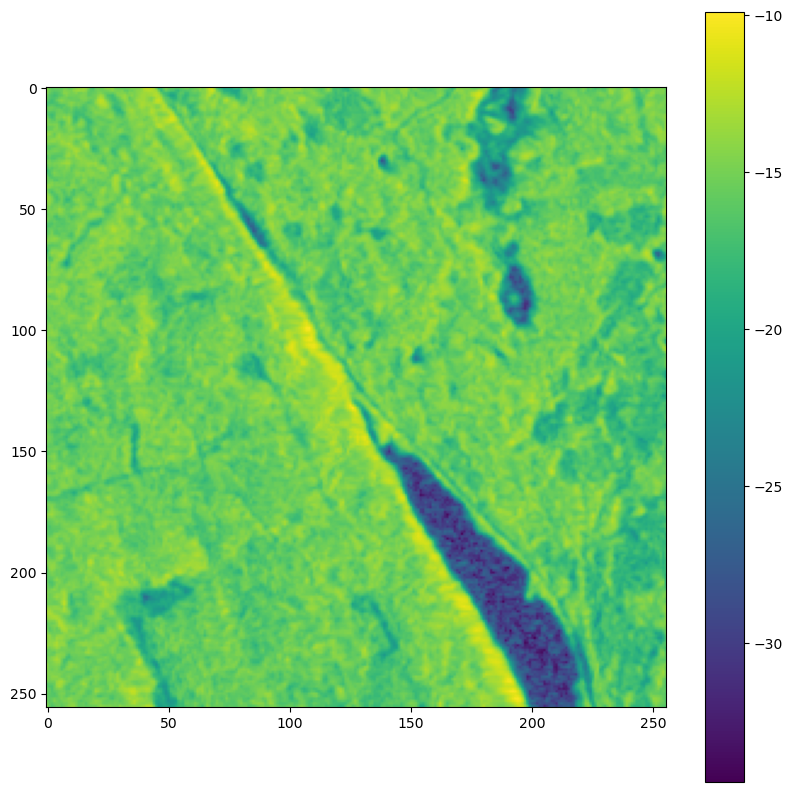

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(data_array)
plt.colorbar()

In [11]:
normalizedData = df1/np.linalg.norm(df1)
print(normalizedData)

[[-0.00341389 -0.0036545  -0.00376757 ... -0.00349769 -0.00356734
  -0.00371645]
 [-0.0034415  -0.00364138 -0.00375245 ... -0.00347805 -0.00344306
  -0.00361774]
 [-0.00346546 -0.00372217 -0.00385633 ... -0.0034545  -0.00346864
  -0.00364468]
 ...
 [-0.00367356 -0.00378489 -0.0037013  ... -0.00353831 -0.00366829
  -0.00392192]
 [-0.00353431 -0.00375927 -0.00383015 ... -0.00367029 -0.0037251
  -0.00378329]
 [-0.00346037 -0.00374557 -0.00391133 ... -0.00378371 -0.00385052
  -0.00390332]]


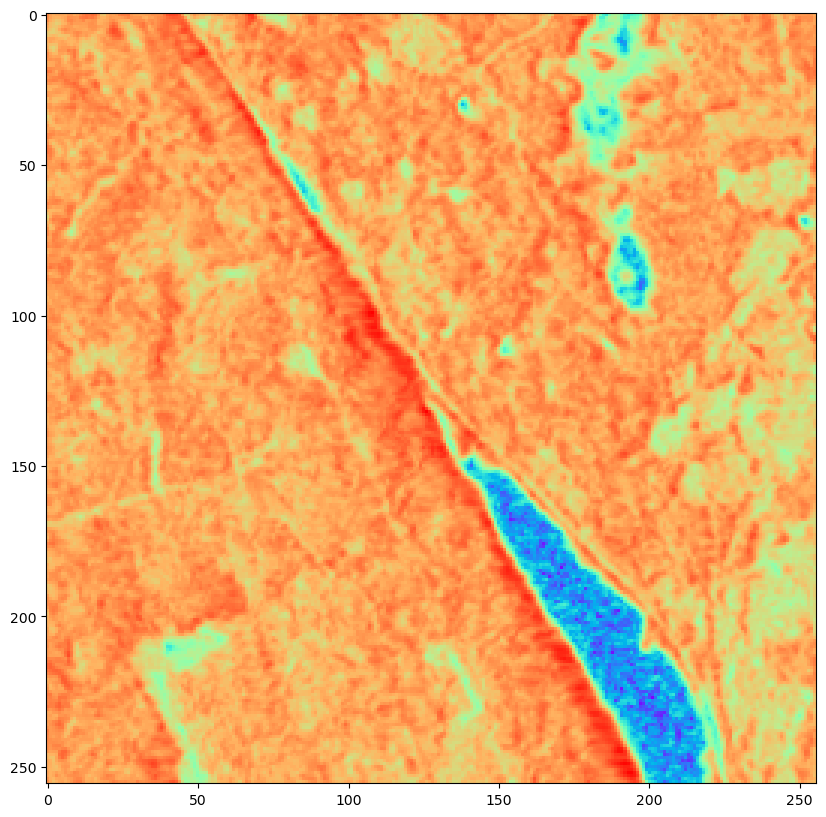

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(normalizedData,cmap="rainbow")

In [13]:
import pandas as pd

In [14]:
k=pd.DataFrame({'file':'0a2d4cec_S1_00.tif',"nparr" : [normalizedData]})

In [15]:
k['nparr'].iloc[0]

array([[-0.00341389, -0.0036545 , -0.00376757, ..., -0.00349769,
        -0.00356734, -0.00371645],
       [-0.0034415 , -0.00364138, -0.00375245, ..., -0.00347805,
        -0.00344306, -0.00361774],
       [-0.00346546, -0.00372217, -0.00385633, ..., -0.0034545 ,
        -0.00346864, -0.00364468],
       ...,
       [-0.00367356, -0.00378489, -0.0037013 , ..., -0.00353831,
        -0.00366829, -0.00392192],
       [-0.00353431, -0.00375927, -0.00383015, ..., -0.00367029,
        -0.0037251 , -0.00378329],
       [-0.00346037, -0.00374557, -0.00391133, ..., -0.00378371,
        -0.00385052, -0.00390332]], dtype=float32)

In [16]:
plt.savefig('plot.tif', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [17]:
from PIL import Image as im

In [18]:
normalizedData.shape

(256, 256)

In [23]:
data=im.fromarray(normalizedData)
data.save("trial/plot.tif")

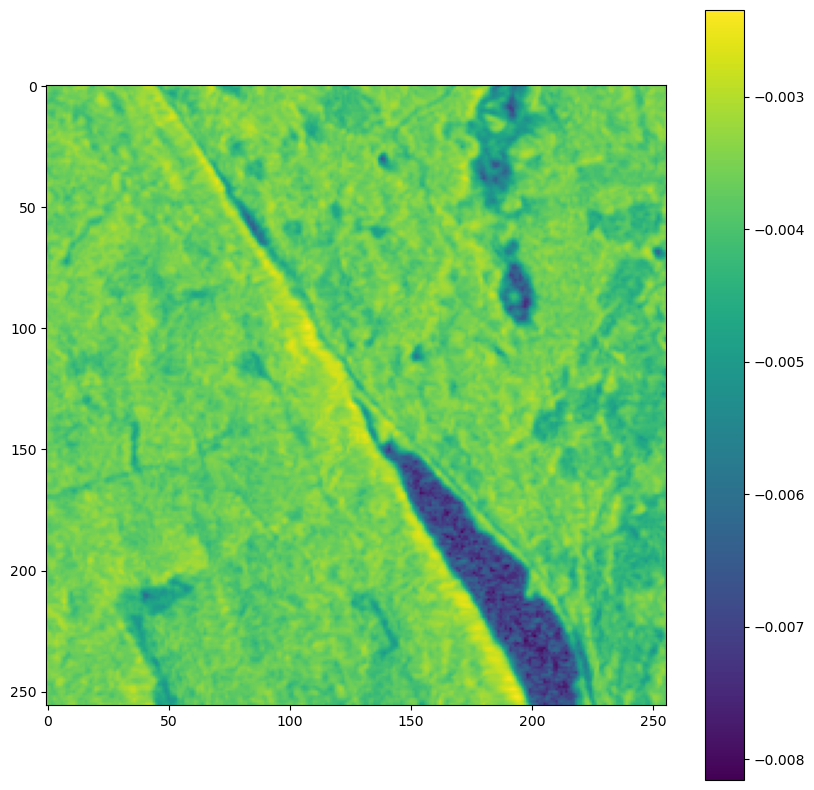

In [22]:
fn = "plot.tif"
ds=gdal.Open(fn)
for i in range(1,5):
    data_array= ds.GetRasterBand(1).ReadAsArray()
plt.figure(figsize=(10,10))
plt.imshow(data_array)
plt.colorbar()
plt.save